In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
path=r'C:\Users\84280\Desktop\lianxi\ex1data1.txt'
data=pd.read_csv(path,header=None, names=['population','profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data.describe() #描述数据

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


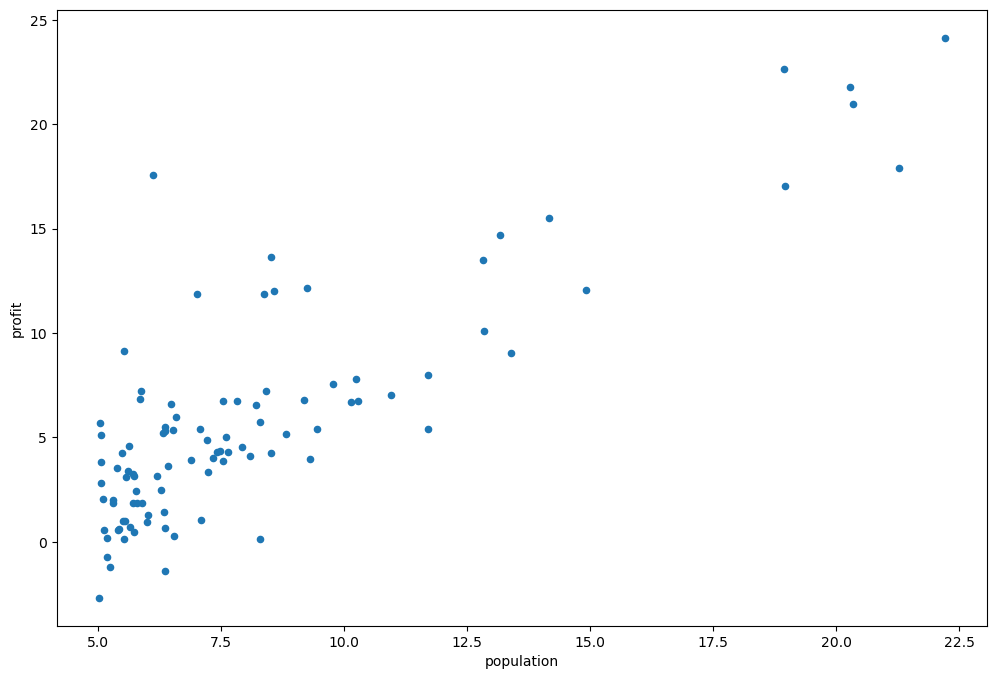

In [7]:
data.plot(kind='scatter',x='population',y='profit',figsize=(12,8))
plt.show()

In [8]:
#定义损失函数
def computeCost(X,y,theta):
    inner=np.power((X*theta.T)-y,2)
    return np.sum(inner)/(2*len(X))
# 这里利用pandas 的insert 函数 dataframe.insert(loc,column,value,allow_duplicates)
data.insert(0,'ones',1)

In [9]:
# 设置训练集和目的集
cols=data.shape[1]
X=data.iloc[:,0:cols-1] #去掉最后一列
y=data.iloc[:,cols-1:cols] 

In [45]:
#初始化矩阵
X=np.matrix(X)
y=np.matrix(y)
theta=np.matrix(np.array([0,0]))
#需要查看数据的维度，这里省略
print(X.shape)

(97, 2)


In [11]:
computeCost(X,y,theta) # 计算初始值的损失函数

32.072733877455676

In [12]:
# batch gradient decent 批量梯度下降
def gradientDescent(X,y,theta,alpha,iters):
    ##X,y 数据集和目标集
    ## theta 权重和系数
    ##alpha 学习率
    ## iters 次数
    temp=np.matrix(np.zeros(theta.shape))
    parameters=int(theta.ravel().shape[1]) # revel 让多维数字变成1位维
    cost=np.zeros(iters) #储存cost的值
    for i in range(iters):
        error=(X*theta.T)-y
        for j in range(parameters):
            term=np.multiply(error,X[:,j]) ##因为我们在上面提前插入了一列值为1 的列，是为截距项
            temp[0,j]=theta[0,j]-(alpha/len(X))*np.sum(term)
        
        theta=temp
        cost[i]=computeCost(X,y,theta)
    return theta, cost

            
    

In [13]:
alpha=0.01
iters=1000
g,cost=gradientDescent(X,y,theta,alpha,iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [14]:
computeCost(X,y,g)

4.515955503078914

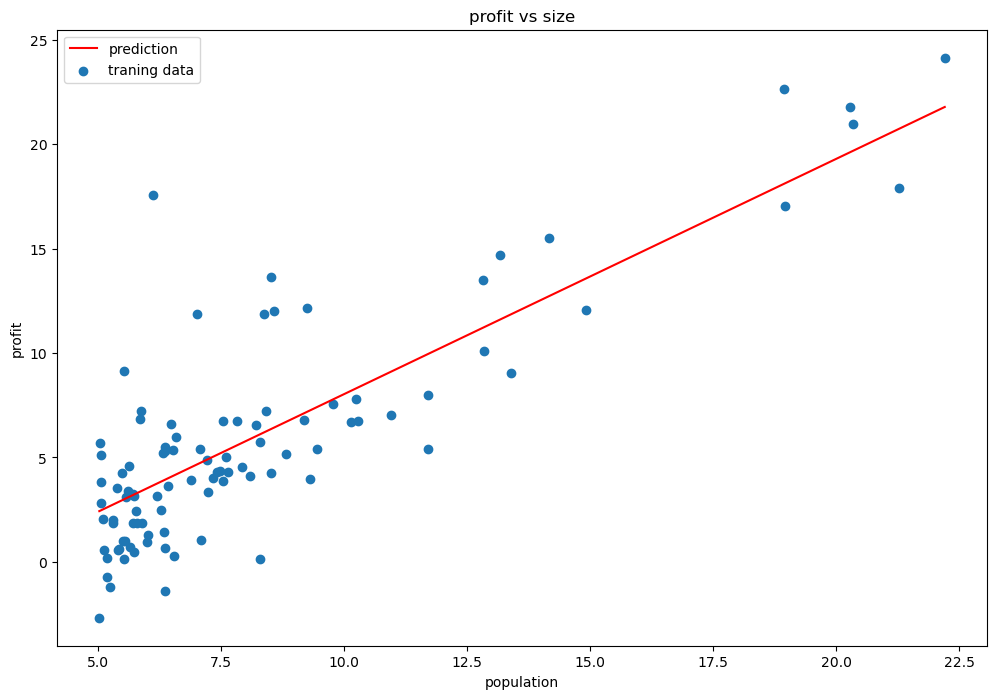

In [15]:
    x=np.linspace(data.population.min(),data.population.max(),100) # 产生均匀的数组
    f=g[0,0]+(g[0,1]*x)
    fig,ax=plt.subplots(figsize=(12,8))
    ax.plot(x,f,'r',label='prediction')
    ax.scatter(data.population,data.profit,label='traning data')
    ax.legend(loc=2)
    ax.set_xlabel('population')
    ax.set_ylabel('profit')
    ax.set_title('profit vs size')
    plt.show()

# 预测函数的作图

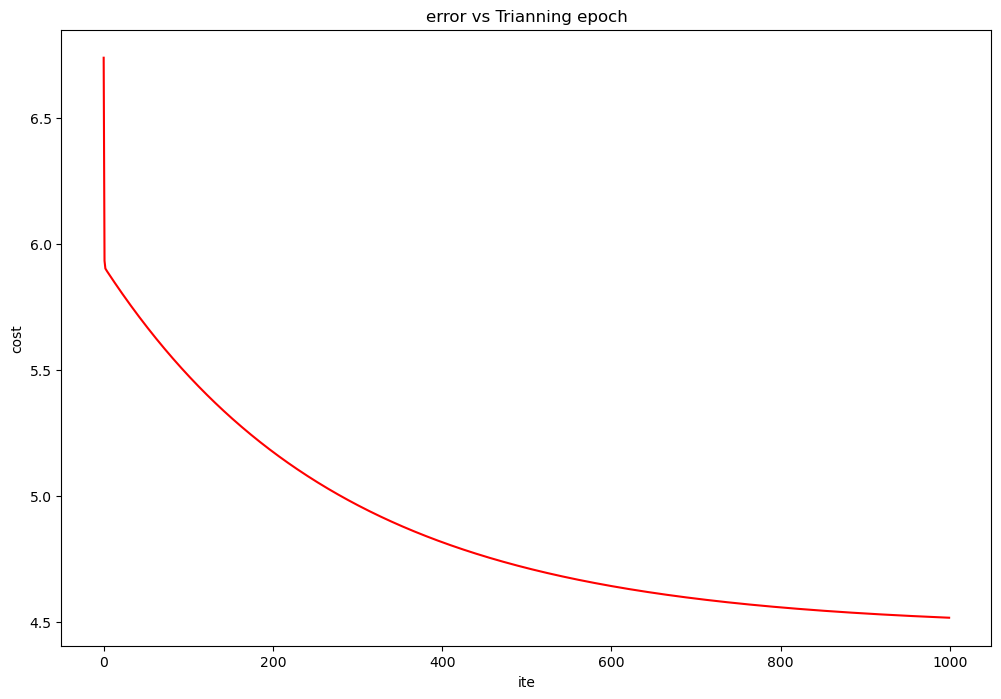

In [16]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('ite')
ax.set_ylabel('cost')
ax.set_title('error vs Trianning epoch')
plt.show()

In [17]:
# 多变量线性回归

path2=r'C:\Users\84280\Desktop\lianxi\ex1data2.txt'
data2=pd.read_csv(path2,header=None,names=['size','bedroom','price'])
data2.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [18]:
### 对于多变量的线性回归我们需要做一个预处理，特征归一化
data2=(data2-data2.mean())/data2.std()# 其实就是求z变量
data2.head()

,size,bedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [19]:
data2.insert(0,'ones',1)

In [40]:
cols=data2.shape[1]
X2=data2.iloc[:,0:cols-1]
y2=data2.iloc[:,cols-1:cols]

X2=np.matrix(X2)

y2=np.matrix(y2)

theta2=np.matrix(np.array([0,0,0]))
g2,Cost2=gradientDescent(X2,y2,theta2,alpha,iters)


In [41]:
computeCost(X2,y2,g2)

0.13070336960771892

<function matplotlib.pyplot.show(close=None, block=None)>

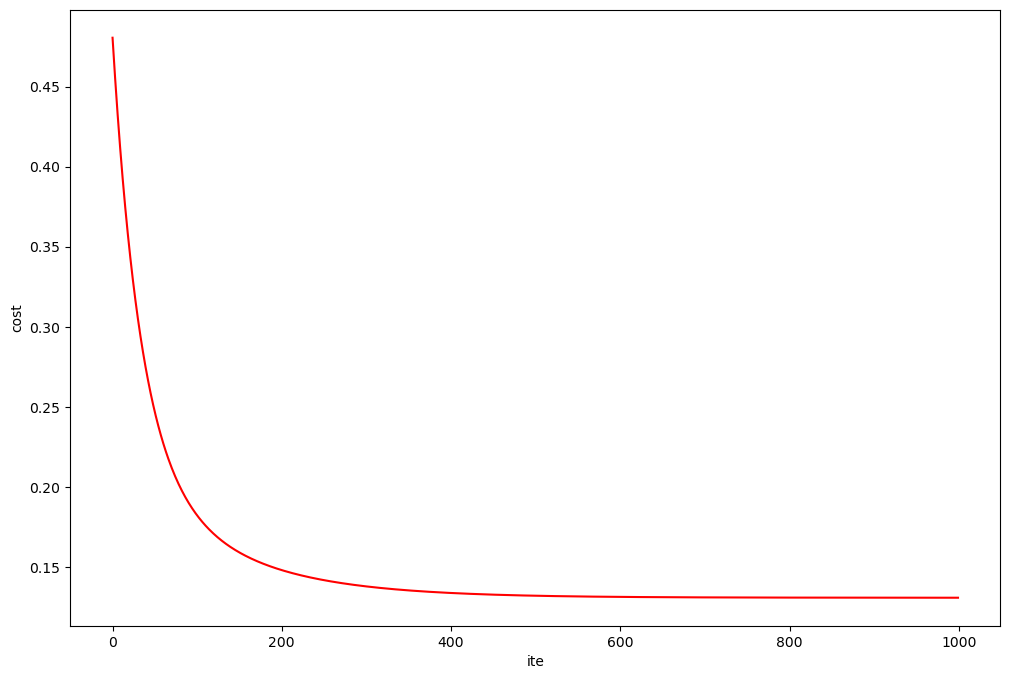

In [42]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),Cost2,'r')
ax.set_xlabel('ite')
ax.set_ylabel('cost')
plt.show

In [44]:
# 利用scikit-learn  来求线性回归（不用从头开始计算

Note: you may need to restart the kernel to use updated packages.


In [48]:
from sklearn import linear_model
model=linear_model.LinearRegression()
X=np.array(X)
y=np.array(y)

## 这里需要注意利用sklearn 的话只能用array的数据不可以用matrix 
model.fit(X,y)

LinearRegression()

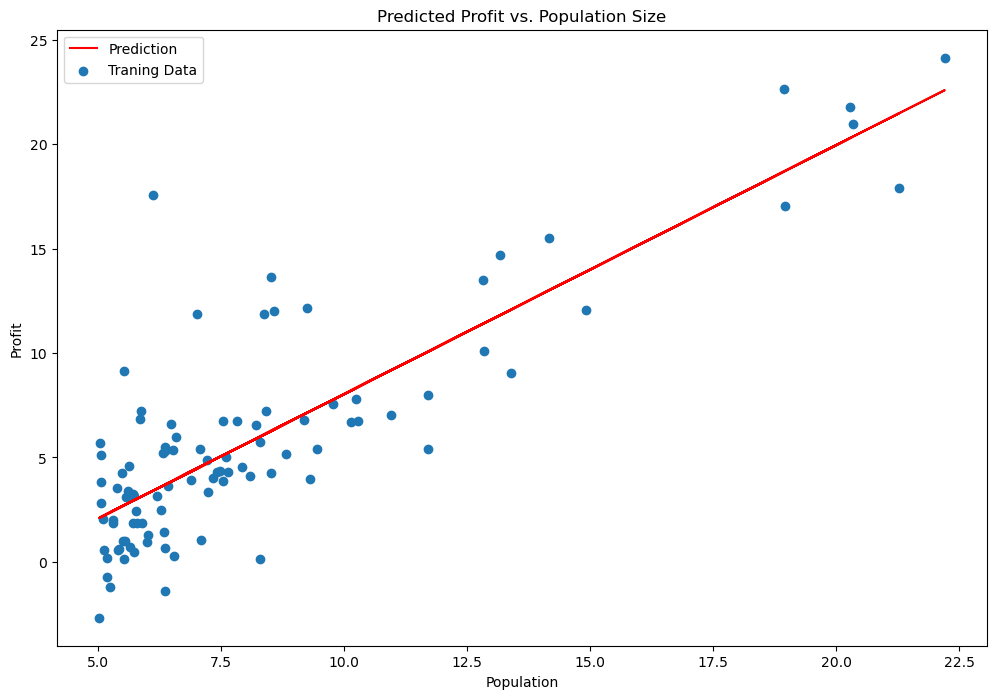

In [51]:
x = np.array(X[:, 1])
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.population, data.profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

In [52]:
##正规方程
def normalEqn(X,y):
    theta=np.linalg.inv(X.T@X)@X.T@y
    return theta


In [54]:
theta=normalEqn(X,y)
theta

array([[-3.89578088],
       [ 1.19303364]])